Hello Michael!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

# Comparing Subscription Plans

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
from matplotlib import pyplot as plt
import math

## Load data

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [3]:
display(df_calls.info())
display(df_calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
display(df_internet.info())
display(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
display(df_messages.info())
display(df_messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
display(df_plans.info())
display(df_plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
display(df_users.info())
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The data frame for users seems to have many empty cells in the churn date column. All columns in all data frames are properly named using all lowercase letters and underscores. Everything else in all other data frames seems fine initially. I will search for duplicates or needed conversions below.

## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
display(df_plans)
display(df_plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [9]:
# Print a sample of data for plans
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


All of the nexessary information for each plan seems to be included. The only thing that may be confusing to customers would be seeing the cost per gb, message, and minute. Some may think that's included in the package, and not the costs after going over the monthly plan. I am not sure how I would change it, so for now I will leave it how it is.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start!
</div>

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [10]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'],format='%Y-%m-%d')
df_users['churn_date'] = df_users['churn_date'].fillna('Unknown')
display(df_users.head(20))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Unknown
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Unknown
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Unknown
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Unknown
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,Unknown
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18 00:00:00
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,Unknown
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,Unknown
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,Unknown


In [11]:
display(df_calls.duplicated().sum())
display(df_internet.duplicated().sum())
display(df_messages.duplicated().sum())
display(df_plans.duplicated().sum())
display(df_users.duplicated().sum())

0

0

0

0

0

No obvious duplicate rows have been found in any row of any data frame. Under the city, there are several cities and corresponding states that need to 

In [12]:
display(df_users[(df_users['first_name'].duplicated()) & (df_users['last_name'].duplicated())])

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
109,1109,Dominic,Salinas,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-16,surf,Unknown
153,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,Unknown
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,Unknown
352,1352,Gavin,Galloway,48,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-08,ultimate,Unknown
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,Unknown
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,Unknown
399,1399,Leonila,Baird,24,"San Antonio-New Braunfels, TX MSA",2018-06-06,surf,Unknown
407,1407,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,Unknown
422,1422,Georgianne,Huff,41,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-03,ultimate,Unknown
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,Unknown


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [13]:
# Print the general/summary information about the users' DataFrame
display(df_users.info())
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Unknown
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Unknown
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Unknown
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Unknown


In [14]:
# Print a sample of data for users

display(df_users.sample(10))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,Unknown
121,1121,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,surf,Unknown
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,Unknown
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,Unknown
218,1218,Stanford,Pena,23,"Bakersfield, CA MSA",2018-01-16,surf,Unknown
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,Unknown
150,1150,Earlie,Giles,46,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-19,ultimate,Unknown
42,1042,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,Unknown
206,1206,Angelic,Singleton,21,"Providence-Warwick, RI-MA MSA",2018-07-09,surf,Unknown
154,1154,Humberto,Pruitt,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-07-18,ultimate,Unknown


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [15]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [16]:
df_users['month'] = df_users['reg_date'].dt.strftime("%Y-%m")
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Unknown,2018-12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown,2018-08
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Unknown,2018-10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Unknown,2018-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Unknown,2018-05


## Calls

In [17]:
# Print the general/summary information about the calls' DataFrame
display(df_calls.info())
display(df_calls.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [18]:
# Print a sample of data for calls
display(df_calls.head(10))


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.strftime("%Y-%m")
display(df_calls.groupby('month')['duration'].sum())

month
2018-01      1180.0
2018-02      5495.0
2018-03     11241.0
2018-04     24651.0
2018-05     42549.0
2018-06     59271.0
2018-07     79645.0
2018-08     96360.0
2018-09    117986.0
2018-10    149624.0
2018-11    176341.0
2018-12    220004.0
Name: duration, dtype: float64

## Messages

In [20]:
# Print the general/summary information about the messages' DataFrame
display(df_messages.info())
display(df_messages.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [21]:
# Print a sample of data for messages

df_messages.sample(10)

,id,user_id,message_date
74092,1475_226,1475,2018-08-17
1845,1019_17,1019,2018-11-26
3320,1036_155,1036,2018-11-06
48608,1326_145,1326,2018-08-13
73580,1472_148,1472,2018-07-04
20774,1131_113,1131,2018-05-15
32365,1203_10,1203,2018-11-10
70648,1460_123,1460,2018-06-16
42642,1280_146,1280,2018-10-21
60752,1382_449,1382,2018-06-23


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: we do not need print() or display() here. We can use just df.sample()/df.head().
</div>

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [22]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
display(df_messages)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [23]:
# Print the general/summary information about the internet DataFrame

display(df_internet.info())
display(df_internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [24]:
# Print a sample of data for the internet traffic

display(df_internet.sample(10))

,id,user_id,session_date,mb_used
21199,1098_242,1098,2018-12-01,112.39
68099,1317_39,1317,2018-11-29,523.03
42257,1187_434,1187,2018-08-11,215.71
37244,1167_167,1167,2018-10-06,753.73
99353,1468_71,1468,2018-10-25,526.82
74523,1351_9,1351,2018-11-27,0.00
95180,1444_131,1444,2018-12-13,242.54
78580,1367_53,1367,2018-11-12,596.95
32301,1146_154,1146,2018-11-03,252.46
93,1001_173,1001,2018-12-15,395.04


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [25]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: we can get month in this way: df_internet['session_date'].dt.month
</div>

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [26]:
# Print out the plan conditions and make sure they are clear for you

display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job!
</div>

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [27]:
# Calculate the number of calls made by each user per month. Save the result.
call_count = df_calls.groupby(['user_id' , 'month']).agg(call_count=('user_id','count'))
display(call_count.head(10))

call_count
user_id month              
1000    2018-12          16
1001    2018-08          27
        2018-09          49
        2018-10          65
        2018-11          64
        2018-12          56
1002    2018-10          11
        2018-11          55
        2018-12          47
1003    2018-12         149

In [28]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_user = df_calls.groupby(['user_id' , 'month']).agg(minutes_per_user=('duration','sum'))
display(minutes_per_user.head(10))

minutes_per_user
user_id month                    
1000    2018-12             124.0
1001    2018-08             182.0
        2018-09             315.0
        2018-10             393.0
        2018-11             426.0
        2018-12             412.0
1002    2018-10              59.0
        2018-11             386.0
        2018-12             384.0
1003    2018-12            1104.0

In [29]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages['month'] = df_messages['message_date'].dt.strftime("%Y-%m")
message_count = df_messages.groupby(['user_id' , 'month']).agg(message_count=('user_id','count'))
display(message_count)

message_count
user_id month                 
1000    2018-12             11
1001    2018-08             30
        2018-09             44
        2018-10             53
        2018-11             36
...                        ...
1496    2018-09             21
        2018-10             18
        2018-11             13
        2018-12             11
1497    2018-12             50

[1806 rows x 1 columns]

In [30]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet['month'] = df_internet['session_date'].dt.strftime("%Y-%m")
internet_volume = df_internet.groupby(['user_id' , 'month']).agg(data=('mb_used','sum'))
internet_volume = np.ceil(internet_volume)
display(internet_volume)

data
user_id month           
1000    2018-12   1902.0
1001    2018-08   6920.0
        2018-09  13315.0
        2018-10  22331.0
        2018-11  18505.0
...                  ...
1498    2018-12  23138.0
1499    2018-09  12985.0
        2018-10  19493.0
        2018-11  16814.0
        2018-12  22060.0

[2277 rows x 1 columns]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice work.
</div>

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [31]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_users_calls =  pd.merge(call_count,minutes_per_user, how='outer',left_on=['user_id','month'],right_on=['user_id','month'])
df_calls_and_minutes = pd.merge(df_users_calls,message_count, how='outer',left_on=['user_id','month'],right_on=['user_id','month'])
calls_minutes_messages = pd.merge(df_calls_and_minutes,internet_volume, how='outer',left_on=['user_id','month'],right_on=['user_id','month'])
users_merged = pd.merge(df_users,calls_minutes_messages, how='outer',left_on=['user_id','month'],right_on=['user_id','month'])
users_merged[['message_count','call_count','minutes_per_user']] = users_merged[['message_count','call_count','minutes_per_user']].fillna(0) 
users_merged = users_merged.sort_values(by=['user_id','month'])
users_merged = users_merged.ffill()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>OK, no worries, but there's just a small mix-up here.
    
Please fix an error and rerun whole project to check your findings.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Let's take a look at how to improve your code.
    
Not all users have messages, calls and internet, right? Our recommendation is to change join strategy (to take all information) and check final df shape and number of users.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>1. Our recommendation here is to use outer join for every join to keep all information.
    
2. Are your sure that ffill is suitable here?
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfect!
</div>

In [32]:
display(users_merged[users_merged['plan']=='ultimate']['message_count'].mean())

33.58633540372671

In [33]:
# Add the plan information
display(df_plans)
display(df_plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [34]:
# Calculate the monthly revenue for each user
def call_revenue(row):
    if(row['plan']=='ultimate'):
        row['minutes_per_user'] -= df_plans[df_plans['plan_name']=='ultimate']['minutes_included']
        minutes = row['minutes_per_user']
        minutes = float(minutes)
        if(minutes > 0):
            return 0.01*minutes
        else:
            return 0
    elif(row['plan']=='surf'):
        row['minutes_per_user'] -= df_plans[df_plans['plan_name']=='surf']['minutes_included']
        minutes = row['minutes_per_user']
        minutes = float(minutes)
        if(minutes > 0):
            return 0.03*minutes
        else:
            return 0
    else:
        return 0
    
def message_revenue(row):
    if(row['plan']=='ultimate'):
        row['message_count'] -= df_plans[df_plans['plan_name']=='ultimate']['messages_included']
        messages = row['message_count']
        messages = int(messages)
        if(messages > 0):    
            return 0.01*messages
        return 0
    elif(row['plan']=='surf'):
        row['message_count'] -= df_plans[df_plans['plan_name']=='surf']['messages_included']
        messages = row['message_count']
        messages = int(messages)
        if(messages > 0):
            return 0.03*(messages)
        return 0
    else:
        return 0

def data_revenue(row):
    if(row['plan']=='ultimate'):
        row['data'] -= df_plans[df_plans['plan_name']=='ultimate']['mb_per_month_included']
        data = row['data']
        data = float(data)
        data = (np.ceil(data/1000))
        if(data > 0):
            return round(7*np.ceil((data/1000)),2)
        else:
            return 0
    elif(row['plan']=='surf'):
        row['data'] -= df_plans[df_plans['plan_name']=='surf']['mb_per_month_included']
        data = row['data']
        data = float(data)
        data = (np.ceil(data/1000))
        if(data > 0):
            return round(10*np.ceil(data),2)
        else:
            return 0
    else:
        return 0

def plan_revenue(plan):
    if(plan['plan'] == 'surf'):
        return int(df_plans[df_plans['plan_name']=='surf']['usd_monthly_pay'])
    elif(plan['plan'] == 'ultimate'):
        return int(df_plans[df_plans['plan_name']=='ultimate']['usd_monthly_pay'])
    else:
        return 0

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Great function! But it's not a good practice to hardcode values, better to use links to df with information.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

In [35]:
user_excess = pd.DataFrame(data=users_merged,columns=users_merged.columns)
user_excess['plan_revenue'] = np.nan
user_excess['data_revenue'] = np.nan
user_excess['call_revenue'] = np.nan
user_excess['message_revenue'] = np.nan

In [36]:
user_excess['plan_revenue'] = users_merged.apply(plan_revenue,axis=1)
user_excess['data_revenue'] = users_merged.apply(data_revenue,axis=1)
user_excess['call_revenue'] = users_merged.apply(call_revenue,axis=1)
user_excess['message_revenue'] = users_merged.apply(message_revenue,axis=1)
user_excess['total_revenue'] = user_excess['plan_revenue'] + user_excess['data_revenue'] + user_excess['call_revenue'] + user_excess['message_revenue']

In [37]:
display(user_excess)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,call_count,minutes_per_user,message_count,data,plan_revenue,data_revenue,call_revenue,message_revenue,total_revenue
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Unknown,2018-12,16.0,124.0,11.0,1902.0,70,0.0,0.0,0.00,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown,2018-08,27.0,182.0,30.0,6920.0,20,0.0,0.0,0.00,20.00
500,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown,2018-09,49.0,315.0,44.0,13315.0,20,0.0,0.0,0.00,20.00
501,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown,2018-10,65.0,393.0,53.0,22331.0,20,70.0,0.0,0.09,90.09
502,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Unknown,2018-11,64.0,426.0,36.0,18505.0,20,40.0,0.0,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,Unknown,2018-05,0.0,0.0,0.0,23138.0,20,80.0,0.0,0.00,100.00
2514,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,Unknown,2018-09,41.0,346.0,0.0,12985.0,20,0.0,0.0,0.00,20.00
2515,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,Unknown,2018-10,53.0,385.0,0.0,19493.0,20,50.0,0.0,0.00,70.00
2516,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,Unknown,2018-11,45.0,308.0,0.0,16814.0,20,20.0,0.0,0.00,40.00


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Why we apply ffill here? Do we have NaNs?
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done.
</div>

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Let's take a look at how to improve your code.
    
Seems we do not need to make another df. We already join all data in one df.
</div>

# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
df_user_calls = pd.merge(df_calls,df_users,how='outer',on='user_id')
plan_surf_call = df_user_calls[df_user_calls['plan']=='surf'].groupby('month_x')['duration'].mean()
plan_ultimate_call = df_user_calls[df_user_calls['plan']=='ultimate'].groupby('month_x')['duration'].mean()

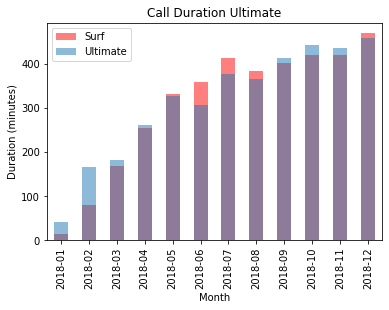

In [38]:
users_merged[users_merged['plan']=='surf'].groupby('month')['minutes_per_user'].mean().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Duration(minutes)',title='Call Duration Surf',alpha=0.5,color='red')
users_merged[users_merged['plan']=='ultimate'].groupby('month')['minutes_per_user'].mean().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Duration (minutes)',title='Call Duration Ultimate',alpha=0.5)
plt.legend(['Surf','Ultimate'])
plt.show()

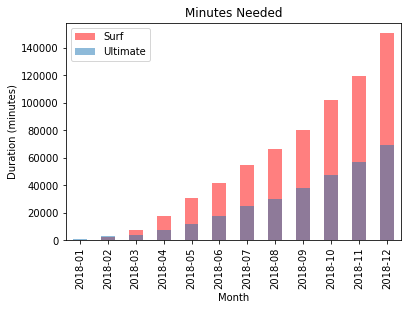

In [39]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
users_merged[users_merged['plan']=='surf'].groupby('month')['minutes_per_user'].sum().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Duration (minutes)',title='Minutes Needed',alpha=0.5,color='red')
users_merged[users_merged['plan']=='ultimate'].groupby('month')['minutes_per_user'].sum().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Duration (minutes)',title='Minutes Needed',alpha=0.5)
plt.legend(['Surf','Ultimate'])
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

# Calculate the mean and the variance of the monthly call duration
'''
surf_mean = df_user_calls[df_user_calls['plan']=='surf'].groupby('month_x')['duration'].mean()
ultimate_mean = df_user_calls[df_user_calls['plan']=='ultimate'].groupby('month_x')['duration'].mean()
surf_var = df_user_calls[df_user_calls['plan']=='surf'].groupby('month_x')['duration'].var()
ultimate_var = df_user_calls[df_user_calls['plan']=='ultimate'].groupby('month_x')['duration'].var()
display(surf_mean)
display(surf_var)
display(ultimate_mean)
display(ultimate_var)
'''

In [40]:
display(round(users_merged[users_merged['plan']=='surf'].groupby('month')['minutes_per_user'].mean(),2))
display(round(users_merged[users_merged['plan']=='surf'].groupby('month')['minutes_per_user'].var(),2))
display(round(users_merged[users_merged['plan']=='ultimate'].groupby('month')['minutes_per_user'].mean(),2))
display(round(users_merged[users_merged['plan']=='ultimate'].groupby('month')['minutes_per_user'].var(),2))

month
2018-01     13.53
2018-02     78.62
2018-03    168.67
2018-04    254.74
2018-05    330.84
2018-06    357.57
2018-07    412.48
2018-08    384.03
2018-09    401.80
2018-10    420.85
2018-11    420.35
2018-12    469.41
Name: minutes_per_user, dtype: float64

month
2018-01     3198.81
2018-02    30349.94
2018-03    45734.68
2018-04    61675.58
2018-05    72353.14
2018-06    64321.61
2018-07    71468.22
2018-08    60941.59
2018-09    50209.24
2018-10    54946.17
2018-11    52496.74
2018-12    65118.20
Name: minutes_per_user, dtype: float64

month
2018-01     40.74
2018-02    166.00
2018-03    182.55
2018-04    262.00
2018-05    327.25
2018-06    305.88
2018-07    376.07
2018-08    364.90
2018-09    413.47
2018-10    442.39
2018-11    434.92
2018-12    459.10
Name: minutes_per_user, dtype: float64

month
2018-01     9330.87
2018-02    70659.62
2018-03    59271.63
2018-04    47204.54
2018-05    61661.34
2018-06    55175.68
2018-07    83235.62
2018-08    67244.46
2018-09    63949.83
2018-10    56974.78
2018-11    63687.02
2018-12    62503.78
Name: minutes_per_user, dtype: float64

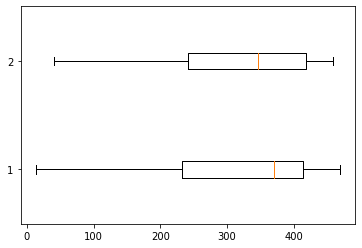

In [41]:
# Plot a boxplot to visualize the distribution of the monthly call duration
data = [users_merged[users_merged['plan']=='surf'].groupby('month')['minutes_per_user'].mean(),users_merged[users_merged['plan']=='ultimate'].groupby('month')['minutes_per_user'].mean()]
plt.boxplot(data,vert=False)
plt.show()

People on the Surf plan typically spend longer on the phone. Almost 100% of surf call durations is larger than the longest 50% of calls of users with the ultimate plan with the exception of an outlier between 6.7 and 6.8. People with surf plans spend more time on calls than users of the ultimate plan.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Let's take a look at how to improve your code.
    
Seems we do not need to make another df. We already join all data in one df.
</div>

In [42]:
# Compare the number of messages users of each plan tend to send each month
#df_user_messages = pd.merge(df_messages,df_users,how='outer',on='user_id')
#plan_surf_message = df_user_messages[df_user_messages['plan']=='surf'].groupby(['user_id','month_x']).count()
#plan_surf_message = plan_surf_message.groupby('month_x')['id'].mean()
#display(plan_surf_message)
display(users_merged[users_merged['plan']=='surf'].groupby('month')['message_count'].mean())
display(users_merged[users_merged['plan']=='ultimate'].groupby('month')['message_count'].mean())

month
2018-01     0.700000
2018-02     3.176471
2018-03     7.800000
2018-04    12.608696
2018-05    19.881720
2018-06    20.974359
2018-07    24.780303
2018-08    26.947977
2018-09    29.840000
2018-10    33.140496
2018-11    32.157895
2018-12    38.239875
Name: message_count, dtype: float64

month
2018-01     3.263158
2018-02     8.882353
2018-03    12.150000
2018-04    17.148148
2018-05    25.861111
2018-06    24.192982
2018-07    28.910448
2018-08    33.317073
2018-09    35.813187
2018-10    38.712963
2018-11    37.715385
2018-12    45.006623
Name: message_count, dtype: float64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Seems not all changes applied here...
</div>

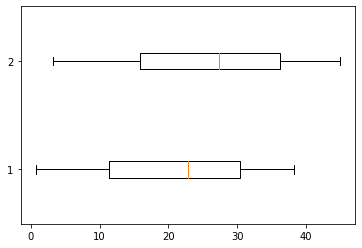

In [43]:
plt.boxplot([users_merged[users_merged['plan']=='surf'].groupby('month')['message_count'].mean(),users_merged[users_merged['plan']=='ultimate'].groupby('month')['message_count'].mean()],vert=False)
plt.show()

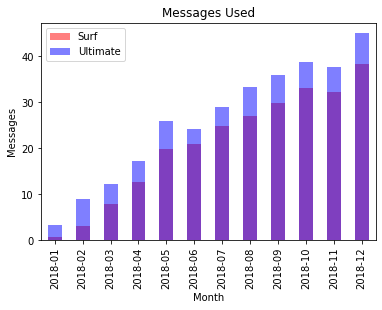

In [44]:
#plan_surf_message.plot(kind='bar',x='month_x',xlabel='Month',ylabel='Messages',title='Messages Used',alpha=0.5,color='red')
#plan_ultimate_message.plot(kind='bar',x='month_x',xlabel='Month',ylabel='Messages',title='Messages Used',alpha=0.5)
users_merged[users_merged['plan']=='surf'].groupby('month')['message_count'].mean().plot(kind='bar',x='month',xlabel='Month',ylabel='Messages',title='Messages Used',alpha=0.5,color='red')
users_merged[users_merged['plan']=='ultimate'].groupby('month')['message_count'].mean().plot(kind='bar',x='month',xlabel='Month',ylabel='Messages',title='Messages Used',alpha=0.5,color='blue')
plt.legend(['Surf','Ultimate'])
plt.show()

People with the Ultimate Plan tend to send more messages per month on average. Customers on the Surf plan vary their number of messages more per month as seen in the box plot. Users from the Surf plan had a significantly larger IQR than the Ultimate plan.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Let's take a look at how to improve your code.
    
Seems we do not need to make another df. We already join all data in one df.
</div>

In [45]:
# Compare the amount of internet traffic consumed by users per plan
#df_user_data = pd.merge(df_internet,df_users,how='outer',on='user_id')
#plan_surf_data = df_user_data[df_user_data['plan']=='surf'].groupby(['user_id','month_x']).count()
#users_merged[users_merged['plan']=='surf'].groupby('month')['data'].mean()
#plan_surf_data = plan_surf_data.groupby('month_x')['id'].mean()
display(users_merged[users_merged['plan']=='surf'].groupby('month')['data'].mean())

month
2018-01    17627.866667
2018-02    15723.029412
2018-03    16357.133333
2018-04    15100.043478
2018-05    14847.043011
2018-06    16107.555556
2018-07    16753.106061
2018-08    17281.763006
2018-09    16782.570000
2018-10    17595.020661
2018-11    16494.982456
2018-12    18163.071651
Name: data, dtype: float64

In [46]:
#plan_ultimate_data = df_user_messages[df_user_messages['plan']=='ultimate'].groupby(['user_id','month_x']).count()
#plan_ultimate_data = plan_ultimate_data.groupby('month_x')['id'].mean()
#display(plan_ultimate_data)
display(users_merged[users_merged['plan']=='ultimate'].groupby('month')['data'].mean())

month
2018-01    14604.684211
2018-02    18683.470588
2018-03    17695.950000
2018-04    15419.296296
2018-05    17649.472222
2018-06    15785.736842
2018-07    16018.059701
2018-08    17836.109756
2018-09    17271.142857
2018-10    17482.685185
2018-11    16951.676923
2018-12    18323.682119
Name: data, dtype: float64

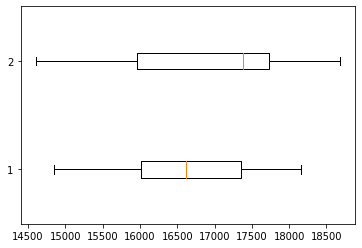

In [47]:
plt.boxplot([users_merged[users_merged['plan']=='surf'].groupby('month')['data'].mean(),users_merged[users_merged['plan']=='ultimate'].groupby('month')['data'].mean()],vert=False)
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

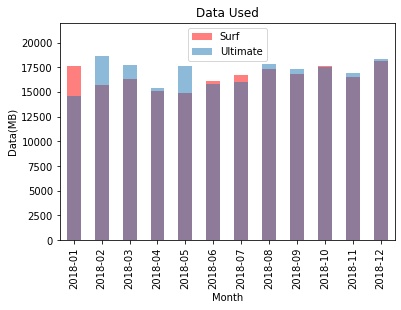

In [48]:
users_merged[users_merged['plan']=='surf'].groupby('month')['data'].mean().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Data(MB)',title='Data Used',alpha=0.5,color='red')
users_merged[users_merged['plan']=='ultimate'].groupby('month')['data'].mean().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Data(MB)',title='Data Used',alpha=0.5)
plt.legend(['Surf','Ultimate'])
plt.ylim(0,22000)
plt.show()

People with the Ultimate plan tend to use a little more data every month as seen in the bar chart. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice vizualisations and good conclusions.
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [49]:
#plan_surf_revenue = (user_excess[user_excess['plan']=='surf'].groupby('month')['total_revenue'].mean())
#plan_ultimate_revenue = (user_excess[user_excess['plan']=='ultimate'].groupby('month')['total_revenue'].mean())
#display(plan_surf_revenue)
#display(plan_ultimate_revenue)
display(user_excess[user_excess['plan']=='surf'].groupby('month')['total_revenue'].mean())
display(user_excess[user_excess['plan']=='ultimate'].groupby('month')['total_revenue'].mean())

month
2018-01    66.333333
2018-02    56.163824
2018-03    61.703333
2018-04    58.341014
2018-05    50.079247
2018-06    54.271795
2018-07    63.436061
2018-08    67.727457
2018-09    60.023350
2018-10    67.127397
2018-11    59.386702
2018-12    71.548723
Name: total_revenue, dtype: float64

month
2018-01    70.000000
2018-02    70.000000
2018-03    71.050000
2018-04    70.518519
2018-05    70.388889
2018-06    70.245614
2018-07    70.208955
2018-08    70.341463
2018-09    70.461538
2018-10    70.388889
2018-11    70.269231
2018-12    70.509934
Name: total_revenue, dtype: float64

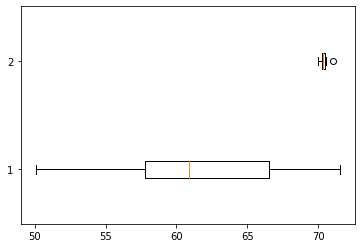

In [50]:
plt.boxplot([user_excess[user_excess['plan']=='surf'].groupby('month')['total_revenue'].mean(),user_excess[user_excess['plan']=='ultimate'].groupby('month')['total_revenue'].mean()],vert=False)
plt.show()

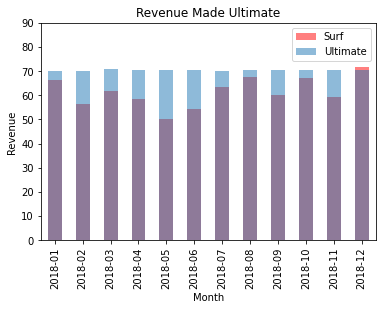

In [51]:
user_excess[user_excess['plan']=='surf'].groupby('month')['total_revenue'].mean().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Revenue',title='Revenue Made Surf',alpha=0.5,color='red')
user_excess[user_excess['plan']=='ultimate'].groupby('month')['total_revenue'].mean().plot(kind='bar',x='month_x',xlabel='Month',ylabel='Revenue',title='Revenue Made Ultimate',alpha=0.5)
plt.legend(['Surf','Ultimate'])
plt.ylim(0,90)
plt.show()

<div class="alert alert-block alert-info">
<b>Conclusion:</b> <a class="tocSkip"></a>
    People on the Ultimate plan typically bring in more revenue than people on the Surf plan.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

[Formulate conclusions about how the revenue differs between the plans.]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Can we formulate some conclusion here?
</div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [52]:
# Test the hypotheses

alpha = 0.05
results = st.ttest_ind(user_excess[user_excess['plan']=='surf'].groupby('month')['total_revenue'].mean() , user_excess[user_excess['plan']=='ultimate'].groupby('month')['total_revenue'].mean() , equal_var=True)
display('p-value:', results.pvalue)

if (results.pvalue < alpha):
    display("We reject the null hypothesis: revenue was significantly lower than the average")
else:
    display("We can't reject the null hypothesis: revenue wasn't significantly lower")

'p-value:'

5.072275708300842e-05

'We reject the null hypothesis: revenue was significantly lower than the average'

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Why we divide pvalue by 2 here?

</div>

<div class="alert alert-block alert-info">
<b>Student reply.</b> <a class="tocSkip"></a>
    I did this initially because I was seeing this as a one sided hypothesis because I wanted to measure the revenue being 70 or more.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Our recommendation is to use ttest_ind here too.
    
Also, we make conclusion based only on pvalue.
</div>

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

The mean monthly revenue doesn't change regardless of the city.
The mean monthly revenue does change in some cities.

In [53]:
# Test the hypotheses

cities = user_excess['city'].unique()
nynj_revenue = (user_excess[user_excess['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA',
                                                      'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
                                                      'Rochester, NY MSA',
                                                      'Albany-Schenectady-Troy, NY MSA',
                                                      'Buffalo-Cheektowaga, NY MSA'])]).groupby('month')['total_revenue'].mean()
interested_value = round(user_excess['total_revenue'].mean(),2)
alpha = 0.05
results = st.ttest_ind(nynj_revenue , user_excess['total_revenue'], equal_var=True)
display(interested_value)
display('p-value:', results.pvalue)

if (results.pvalue < alpha) and (nynj_revenue.mean() < interested_value):
    display("We reject the null hypothesis: revenue was significantly lower than average")
else:
    display("We can't reject the null hypothesis: revenue wasn't significantly lower")

65.43

'p-value:'

0.5038170148377771

"We can't reject the null hypothesis: revenue wasn't significantly lower"

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Seems we missed second test =)

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Something needs to be changed, but don't worry, you've got this.
    
1. Based on project requirements, we need to test 2 hypotheses: "The average revenue from users of Ultimate and Surf calling plans differs." and "The average revenue from users in NY-NJ area is different from that of the users from other regions.". We do not need to apply test for 70 dollars or something else.
    
<s>2. Our recommendation here is to use ttest_ind test.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We make conclusion based only on pvalue.
</div>

In [54]:
# reviewer's example

if (results.pvalue < alpha):
    display("We reject the null hypothesis: revenue was significantly lower than average")
else:
    display("We can't reject the null hypothesis: revenue wasn't significantly lower")

"We can't reject the null hypothesis: revenue wasn't significantly lower"

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Please add final conclusion.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Michael, please do not forget to rerun whole project before sending!

</div>

<div class="alert alert-block alert-info">
<b>Conclusion.</b> <a class="tocSkip"></a>
    Overall, more customers buy the surf plan and would rather pay a little more by going over their allowances. There is a significant loss of potential revenue by more people using Surf. Customers on the Ultimate plan give about 70 dollars of revenue while Surf members only bring in between 35-55 dollars per month. The average revenue brought in does not change by the geographic location of customers though. Customers on the Ultimate plan use a lot more data and send a few more messages on average monthly.
</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!

</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Michael, thank you for correcting your project!
    
However, there are still some issues. I wrote comments. Please elaborate them.
    
<span class="text-danger"> Remember: in case of any problems, you can contact your tutor. </span>
    
You have good analytic skills, keep up the good work! I will be waiting for your corrected project.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Thanks for sending in your project with corrections. It's clear you've put a lot of effort into it.
    
There's still an issue with Test statistical hypotheses. Could you take a second glance at it? 
    
<span class="text-danger"> Please do not forget to rerun project before sending! </span>
    
Keep working on it, you are improving!
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v3</b> <a class="tocSkip"></a>

Much better!
    
Your project has been accepted and you can go to the next sprint.
</div>